# **Goal of project**

## 다음 분기에 어떤 게임을 설계해야 할까

## 🕹️ Data Description

- Name : 게임의 이름입니다.
- Platform : 게임이 지원되는 플랫폼의 이름입니다.
- Year : 게임이 출시된 연도입니다.
- Genre : 게임의 장르입니다.
- Publisher : 게임을 제작한 회사입니다.
- NA_Sales : 북미지역에서의 출고량입니다.
- EU_Sales : 유럽지역에서의 출고량입니다.
- JP_Sales : 일본지역에서의 출고량입니다.
- Other_Sales : 기타지역에서의 출고량입니다.

## 반드시 들어가야 하는 내용
- 지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.
- 연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.
- 출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.
위 3가지 내용과 여러분들의 **개인적인 분석 목표, 질문을 더하여 프로젝트를 완성**하세요.

## 배운 내용
- Sprint 1 : EDA, Feature Engineering, Data Manipulation, Data Visualization
- Sprint 2 : Hypothesis Test, CI, Bayesian
- Sprint 3 : DR, PCA, Cluster

당연히 어떠한 코드, 분석, 라이브러리 혹은 목표를 가지는지는 온전히 신정인님의 자유입니다.

그러나, **Section 1 Project 인 만큼 해당 기간 동안 배운 내용을 위주로 설정하는 것이 권장됩니다.**

아직 배우지 않은 Deep Learning을 사용하면 곤란하겠죠?

추가로, 발표를 듣는 사람은 비데이터 직군이라 가정합니다.

즉 생각이나 가정들을 설명하는 과정에서 최대한 배경지식이 없는 사람들도 이해할 수 있도록 노력하셔야 할 겁니다.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 데이터 불러오기 (colab 파일폴더에 업로드)

url = '/content/vgames2.csv'
df = pd.read_csv(url)

df.head(10)

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
5,6,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0,0,0.14,0
6,7,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,0.02,0.01,0,0
7,8,Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,0.07,0,0.11,0.01
8,9,Imabikisou,PS3,2007.0,Adventure,Sega,0,0,0.04,0
9,10,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,0.04,0.03,0,0.01


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


In [ ]:
df.isnull().sum()

Unnamed: 0       0
Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [ ]:
# 결측치 처리 : 연도, 장르 등 재지정하기 어렵기 때문에 drop

df = df.dropna()
df.isnull().sum()

Unnamed: 0     0
Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

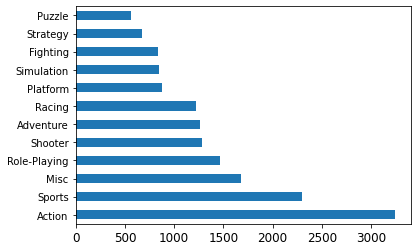

In [ ]:
# 장르 확인

df.Genre.value_counts().plot.barh()

In [ ]:
# Year 이상치 확인하기

df.Year.value_counts(ascending=True).head(20)

86.0      1
2020.0    1
94.0      1
97.0      2
12.0      2
1.0       2
13.0      2
14.0      2
2017.0    3
7.0       3
98.0      3
96.0      3
2.0       3
0.0       3
95.0      4
5.0       4
4.0       4
15.0      5
16.0      5
3.0       7
Name: Year, dtype: int64

In [ ]:
# 출고량 이상치 확인하기

df.NA_Sales.value_counts(ascending=True).head(20)

3.02     1
2.9      1
4.36     1
4        1
240K     1
4.05     1
6.99     1
5.89     1
3.92     1
4.98     1
3.24     1
70K      1
3.83     1
2.84     1
0.28M    1
6.06     1
2.58     1
3.64     1
1.11M    1
3.39     1
Name: NA_Sales, dtype: int64

In [ ]:
# Year 처리 : 0~21 -> 2020, 80~99 -> 1999
# numpy where 활용 : (조건,True일때,False일때)

df['Year'] = df.Year.astype(int)
df['Year'] = np.where(df['Year'] < 22 , df['Year']+2000, df['Year'])
df['Year'] = np.where(df['Year'] < 100 , df['Year']+1900, df['Year'])

In [ ]:
# 데이터 확인

df.Year.value_counts(ascending=True).head(20)

2020      1
2017      3
1980      8
1984     14
1985     14
1988     15
1987     16
1990     16
1983     17
1989     17
1986     21
1982     36
1991     41
1992     43
1981     46
1993     60
1994    121
1995    219
1996    262
1997    289
Name: Year, dtype: int64

In [ ]:
# Sales 처리 : 기본 단위를 M으로 판단, M > 제거

df['NA_Sales'] = df['NA_Sales'].str.replace('M','')
df['EU_Sales'] = df['EU_Sales'].str.replace('M','')
df['JP_Sales'] = df['JP_Sales'].str.replace('M','')
df['Other_Sales'] = df['Other_Sales'].str.replace('M','')

In [ ]:
# K : 제거 후 x 1/1000 (1K=0.001M)

df['NA_Sales'] = np.where(df['NA_Sales'].str.contains('K', case=False) , (df['NA_Sales'].str.replace('K','').astype(float))*0.001, df['NA_Sales'])
df['EU_Sales'] = np.where(df['EU_Sales'].str.contains('K', case=False) , (df['EU_Sales'].str.replace('K','').astype(float))*0.001, df['EU_Sales'])
df['JP_Sales'] = np.where(df['JP_Sales'].str.contains('K', case=False) , (df['JP_Sales'].str.replace('K','').astype(float))*0.001, df['JP_Sales'])
df['Other_Sales'] = np.where(df['Other_Sales'].str.contains('K', case=False) , (df['Other_Sales'].str.replace('K','').astype(float))*0.001, df['Other_Sales'])

In [ ]:
# float type으로 변경

df['NA_Sales'] = np.round(df.NA_Sales.astype(float), 3)
df['EU_Sales'] = np.round(df.EU_Sales.astype(float), 3)
df['JP_Sales'] = np.round(df.JP_Sales.astype(float), 3)
df['Other_Sales'] = np.round(df.Other_Sales.astype(float), 3)

In [ ]:
# K, M 처리 확인

df.NA_Sales.value_counts(ascending=True).head(20)

4.98    1
9.43    1
3.83    1
3.02    1
3.78    1
4.10    1
3.88    1
4.14    1
1.62    1
3.44    1
5.03    1
3.19    1
2.58    1
2.77    1
6.72    1
2.48    1
1.83    1
9.54    1
5.57    1
1.86    1
Name: NA_Sales, dtype: int64

In [ ]:
# Unnamed 컬럼 drop

df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
# 전처리 확인

df_game = df
df_game.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  int64  
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  float64
 6   EU_Sales     16241 non-null  float64
 7   JP_Sales     16241 non-null  float64
 8   Other_Sales  16241 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.2+ MB


------------------------ 전처리 완료 ------------------------

In [ ]:
df_game.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04


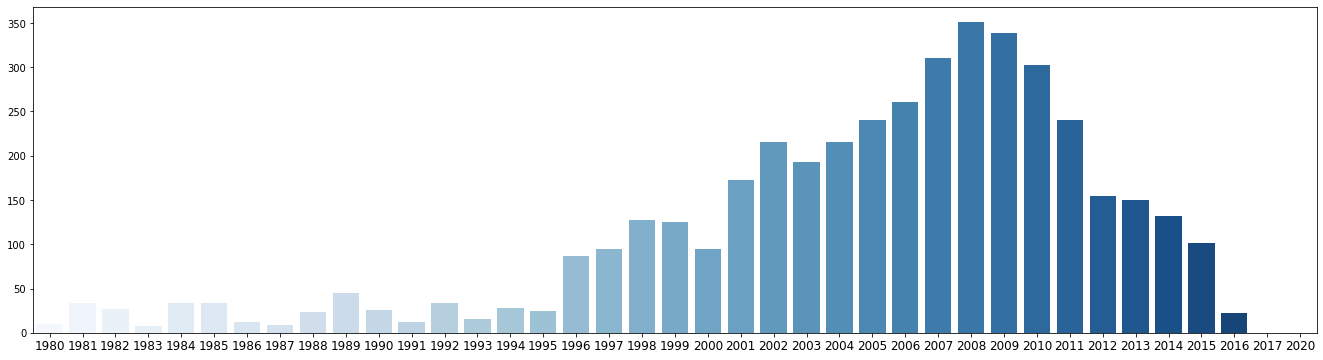

In [ ]:
# 연도별 판매량 시각화

sum_sales = df_game.groupby(['Year'])['NA_Sales'].sum().to_frame().sort_values(by='Year', ascending=False)

plt.figure(figsize=(23,6))
sns.barplot(data=sum_sales, x=sum_sales.index, y='NA_Sales', palette='Blues')

plt.xlabel('')
plt.ylabel('')

plt.show()

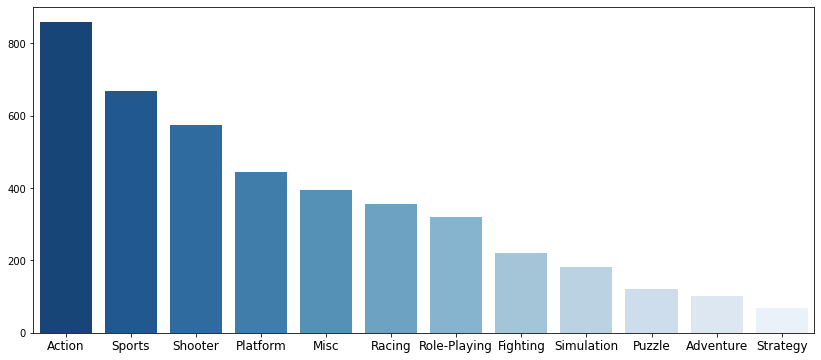

In [ ]:
# 장르별 판매량 시각화

sum_sales = df_game.groupby(['Genre'])['NA_Sales'].sum().to_frame().sort_values(by='NA_Sales', ascending=False)

plt.figure(figsize=(14,6))
sns.barplot(data=sum_sales, x=sum_sales.index, y='NA_Sales', palette='Blues_r')

plt.xlabel('')
plt.ylabel('')

plt.show()

In [ ]:
df_pie = pd.DataFrame({'Location':['NA','EU','JP','Other'],
                       'Sales':[df_game.NA_Sales.sum(), df_game.EU_Sales.sum(), df_game.JP_Sales.sum(), df_game.Other_Sales.sum()]})
df_pie

,Location,Sales
0,NA,4307.04
1,EU,2393.57
2,JP,1271.39
3,Other,783.37


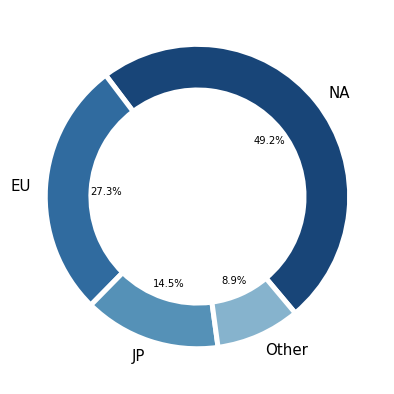

In [ ]:
# 지역별 총 판매량 시각화

blues = ['#184578','#306B9F','#5591B7','#86B3CD'] 

plt.figure(figsize=(7,7))
plt.rc('xtick', labelsize=15)
wedgeprops={'width': 0.3, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(df_pie.Sales, labels=df_pie.Location, autopct='%.1f%%', colors=blues, wedgeprops=wedgeprops, startangle=310)


plt.show()

In [ ]:
df_game.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16241.000000,16241.000000,16241.000000,16241.000000,16241.000000
mean,2006.406748,0.265195,0.147378,0.078283,0.048234
std,5.832087,0.822431,0.508340,0.309272,0.189678
min,1980.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000
max,2020.000000,41.490000,29.020000,10.220000,10.570000


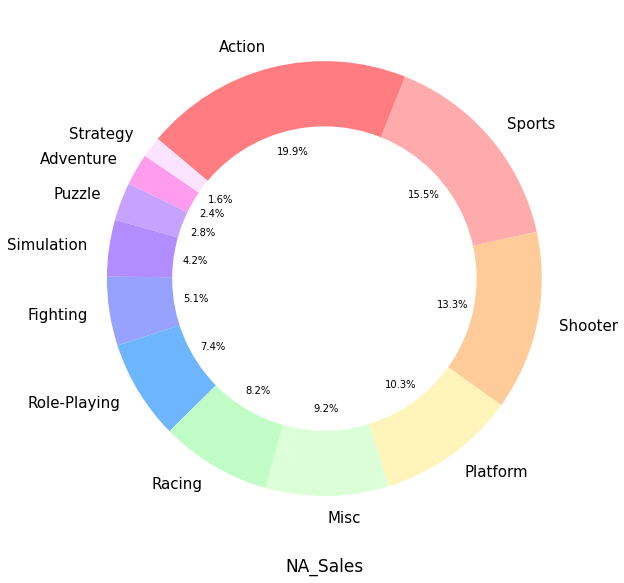

In [ ]:
# 각 지역별 선호장르 시각화

colors = ['#fbe4ff','#ff9cee','#c5a3ff','#b28dff','#97a2ff','#6eb5ff','#bffcc6','#dbffd6','#fff5ba','#ffcc99','#ffabab','#ff7c80']

genre_group1 = df_game.groupby(['Genre'])['NA_Sales'].sum().sort_values(ascending=True)
genre_group1.plot.pie(subplots=False, figsize=(10, 10), autopct='%1.1f%%', startangle=140, colors = colors)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.rc('xtick', labelsize=15)
plt.title('NA_Sales',position=(0.5,-0.05),fontsize=17)
plt.ylabel('')

plt.show()

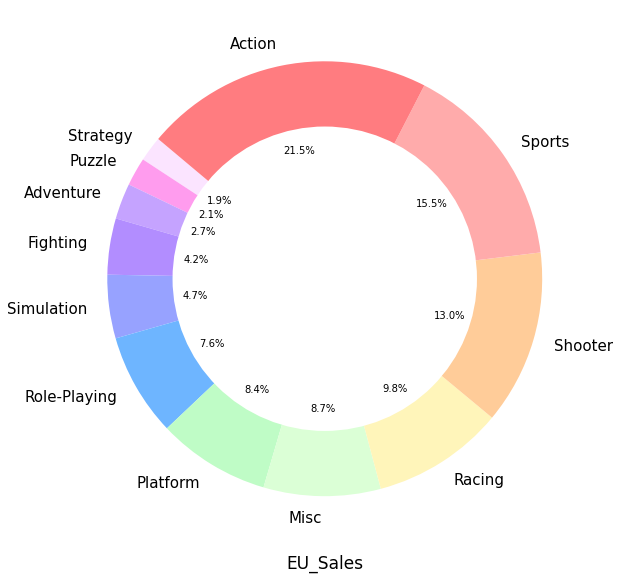

In [ ]:
genre_group2 = df_game.groupby(['Genre'])['EU_Sales'].sum().sort_values(ascending=True)
genre_group2.plot.pie(subplots=False, figsize=(10, 10), autopct='%1.1f%%', startangle=140, colors = colors)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.rc('xtick', labelsize=15)
plt.xlabel('EU_Sales', position=(0.5,-0.05),fontsize=17)
plt.ylabel('')

plt.show()

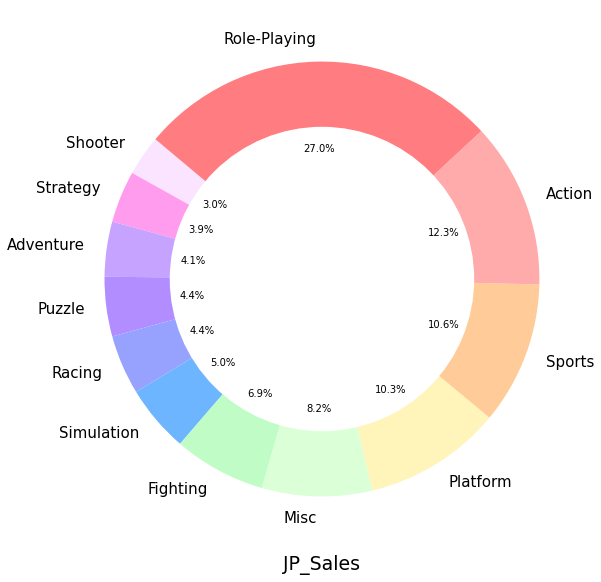

In [ ]:
genre_group3 = df_game.groupby(['Genre'])['JP_Sales'].sum().sort_values(ascending=True)
genre_group3.plot.pie(subplots=False, figsize=(10, 10), autopct='%1.1f%%', startangle=140, colors = colors)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.rc('xtick', labelsize=15)
plt.xlabel('JP_Sales', position=(0.5,-0.05),fontsize=19)
plt.ylabel('')

plt.show()

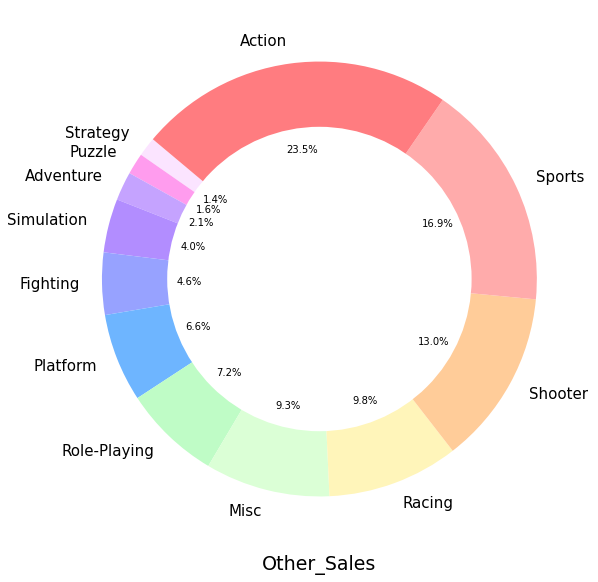

In [ ]:
genre_group4 = df_game.groupby(['Genre'])['Other_Sales'].sum().sort_values(ascending=True)
genre_group4.plot.pie(subplots=False, figsize=(10, 10), autopct='%1.1f%%', startangle=140, colors = colors)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.rc('xtick', labelsize=15)
plt.xlabel('Other_Sales', position=(0.5,-0.05),fontsize=19)
plt.ylabel('')

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


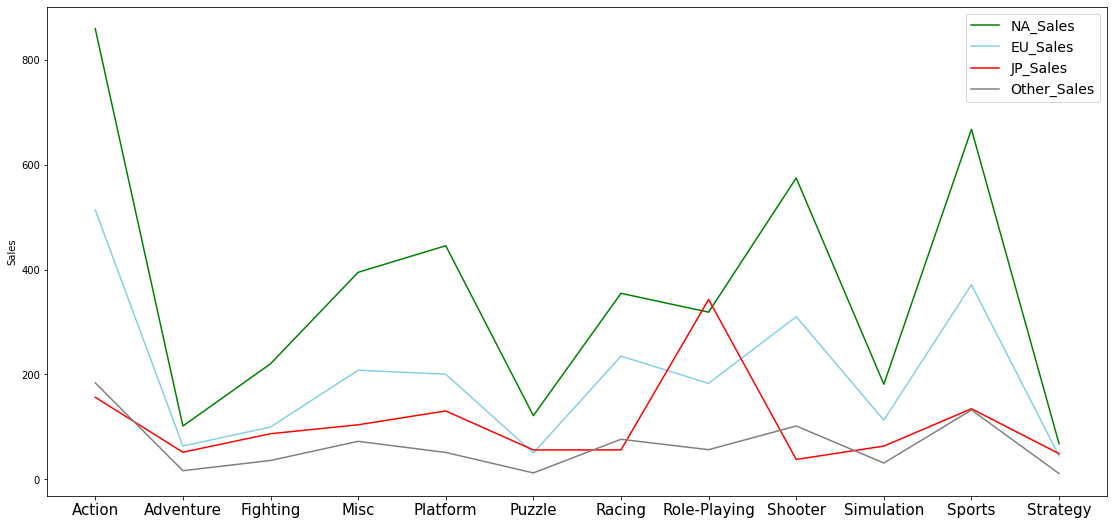

In [ ]:
# 지역별 선호장르 분석 2

genre_group = df_game.groupby(['Genre'])['NA_Sales','EU_Sales','JP_Sales','Other_Sales'].sum()

plt.figure(figsize=(19,9))

sns.lineplot(data=genre_group,x=genre_group.index, y='NA_Sales',color='green')
sns.lineplot(data=genre_group,x=genre_group.index, y='EU_Sales',color='skyblue')
sns.lineplot(data=genre_group,x=genre_group.index, y='JP_Sales',color='red')
sns.lineplot(data=genre_group,x=genre_group.index, y='Other_Sales',color='gray')

plt.xlabel('')
plt.ylabel('Sales')
plt.legend(genre_group.columns)

plt.show()

In [ ]:
# 가설 검정

# 귀무가설 : 지역에 따라 선호하는 게임의 장르가 다르지 않다. (연관이 없다)
# 대립가설 : 지역에 따라 선호하는 게임의 장르가 있다. (연관이 있다)
# 유의 수준이 5% 미만일 경우 귀무 가설을 기각하고 대립가설을 채택한다. 

# 두개의 변수로 카이제곱검정 시행

from scipy.stats import chi2_contingency

genre_loca = genre_group.transpose()

genre_loca.head()

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
NA_Sales,858.75,101.79,220.35,394.73,445.38,121.58,354.70,318.76,574.48,181.43,667.26,67.83
EU_Sales,513.64,63.66,99.90,208.15,200.63,50.47,235.02,183.09,310.23,112.99,370.97,44.82
JP_Sales,156.60,51.87,87.14,104.18,130.53,56.24,56.32,342.93,38.18,63.54,134.76,49.10
Other_Sales,183.99,16.70,36.15,72.64,51.45,12.44,76.51,56.73,101.86,31.32,132.35,11.23


In [ ]:
# 카이제곱 검정 시행, p-value 확인

chi2 = chi2_contingency(genre_loca, correction=False)

chi2[1]

9.635373883711956e-123

- p-value가 유의수준 0.05보다 훨씬 작으므로, 귀무가설을 기각하고 대립가설을 채택한다.

In [ ]:
# NA와 EU 만 비교

df_naeu = genre_loca[0:2]
df_naeu

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
NA_Sales,858.75,101.79,220.35,394.73,445.38,121.58,354.70,318.76,574.48,181.43,667.26,67.83
EU_Sales,513.64,63.66,99.90,208.15,200.63,50.47,235.02,183.09,310.23,112.99,370.97,44.82


In [ ]:
chi2_naeu = chi2_contingency(df_naeu, correction=False)

chi2_naeu[1]

0.03246465882811156

- NA와 EU만을 비교해도 p-value가 0.05 미만으로, 지역에 따른 선호 장르가 있는 것으로 판단.

In [ ]:
# 연도에 따른 트렌드 확인

year_group = df_game.groupby(['Year','Genre'])['NA_Sales','EU_Sales','JP_Sales','Other_Sales'].sum()

year_group

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


NA_Sales  EU_Sales  JP_Sales  Other_Sales
Year Genre                                                  
1980 Action            0.32      0.02      0.00         0.00
     Fighting          0.72      0.04      0.00         0.01
     Misc              2.53      0.15      0.00         0.02
     Shooter           6.56      0.43      0.00         0.08
1981 Action           13.86      0.81      0.00         0.12
...                     ...       ...       ...          ...
2016 Sports            4.57      7.36      0.78         1.92
     Strategy          0.11      0.32      0.05         0.04
2017 Action            0.00      0.00      0.01         0.00
     Role-Playing      0.00      0.00      0.04         0.00
2020 Simulation        0.27      0.00      0.00         0.02

[388 rows x 4 columns]

In [ ]:
year_group['Total_Sales'] = year_group.NA_Sales + year_group.EU_Sales + year_group.JP_Sales + year_group.Other_Sales

year_group

NA_Sales  EU_Sales  JP_Sales  Other_Sales  Total_Sales
Year Genre                                                               
1980 Action            0.32      0.02      0.00         0.00         0.34
     Fighting          0.72      0.04      0.00         0.01         0.77
     Misc              2.53      0.15      0.00         0.02         2.70
     Shooter           6.56      0.43      0.00         0.08         7.07
1981 Action           13.86      0.81      0.00         0.12        14.79
...                     ...       ...       ...          ...          ...
2016 Sports            4.57      7.36      0.78         1.92        14.63
     Strategy          0.11      0.32      0.05         0.04         0.52
2017 Action            0.00      0.00      0.01         0.00         0.01
     Role-Playing      0.00      0.00      0.04         0.00         0.04
2020 Simulation        0.27      0.00      0.00         0.02         0.29

[388 rows x 5 columns]

In [ ]:
# 연도별 장르의 순위 표시하기

# year_group['Rank'] = year_group.groupby('Year')['Total_Sales'].rank(ascending=False)

In [ ]:
# year_group.head()

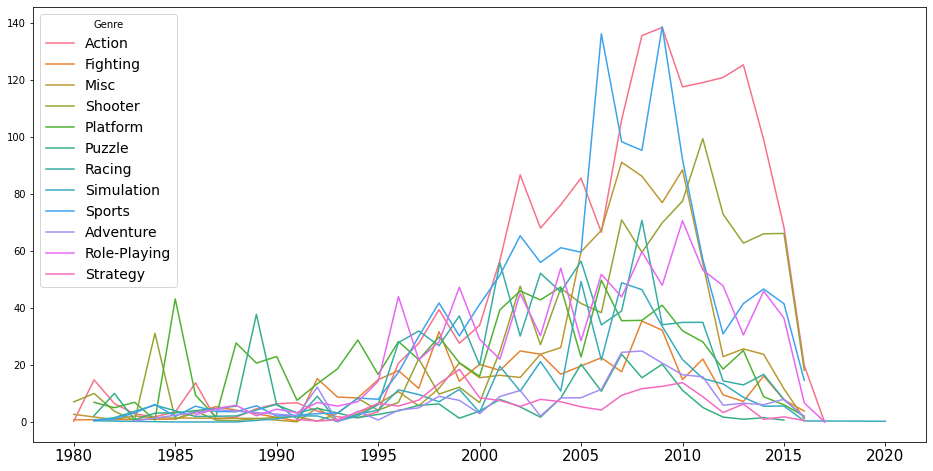

In [ ]:
# 시각화 -> 보기 힘들다

plt.figure(figsize=(16,8))
sns.lineplot(data=year_group, x='Year', y='Total_Sales',hue='Genre')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [ ]:
# 시각화2

df_total = year_group.loc[:,['Total_Sales']]
df_total

Total_Sales
Year Genre                    
1980 Action               0.34
     Fighting             0.77
     Misc                 2.70
     Shooter              7.07
1981 Action              14.79
...                        ...
2016 Sports              14.63
     Strategy             0.52
2017 Action               0.01
     Role-Playing         0.04
2020 Simulation           0.29

[388 rows x 1 columns]

In [ ]:
# 데이터 형태 변경 : Year을 인덱스, Genre를 컬럼으로

df_new =  df_total.reset_index().pivot('Year','Genre','Total_Sales').rename_axis(index=None,columns=None)
df_new = df_new.fillna(0)

df_new.head()

,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
1980,0.34,0.0,0.77,2.70,0.00,0.00,0.00,0.0,7.07,0.00,0.00,0.0
1981,14.79,0.0,0.00,0.00,6.92,2.25,0.48,0.0,10.02,0.44,0.78,0.0
1982,6.50,0.0,0.00,0.87,5.03,10.04,1.57,0.0,3.81,0.00,1.06,0.0
1983,2.86,0.4,0.00,2.14,6.93,0.78,0.00,0.0,0.49,0.00,3.20,0.0
1984,1.85,0.0,0.00,1.45,0.69,3.14,5.95,0.0,31.10,0.00,6.17,0.0


<Figure size 1152x576 with 0 Axes>

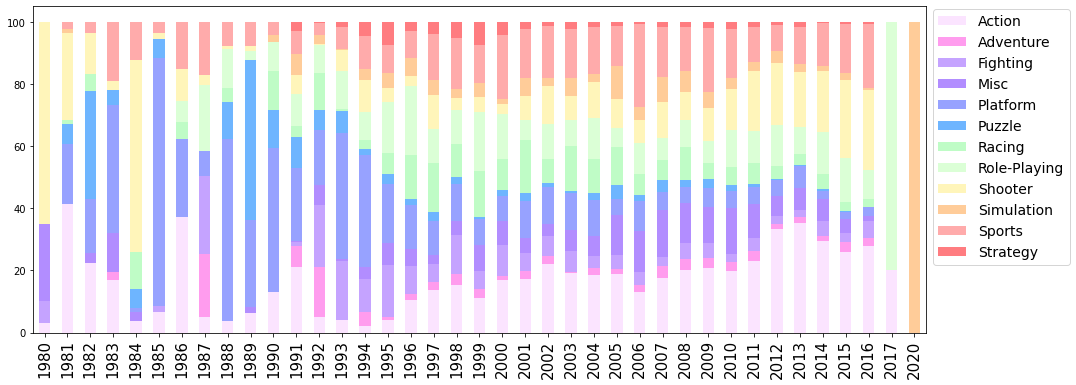

In [ ]:
# 연도별 장르의 비율 시각화
# Stacked Bar Plot

plt.figure(figsize=(16,8))

stacked_data = df_new.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind='bar', stacked=True, figsize=(16,6),color=colors)
plt.rc('legend', fontsize=14)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.6))

In [ ]:
# 가설 검정 : 카이제곱 검정 시행

# 귀무가설 : 연도에 따라 유행하는 게임은 다르지 않다.
# 대립가설 : 연도에 따라 유행하는 게임이 다르다. (트렌즈가 존재한다)

chi2_year_genre = chi2_contingency(df_new, correction=False)

# p-value 확인
chi2_year_genre[1]

0.0

In [ ]:
# 출고량이 높은 게임에 대한 분석 및 시각화
# 출고량이 높은 게임 확인

df_best = df_game

df_best['Total_Sales'] = df_best.NA_Sales + df_best.EU_Sales + df_best.JP_Sales + df_best.Other_Sales
df_best = df_best.drop(['NA_Sales','EU_Sales','JP_Sales','Other_Sales'], axis=1)
df_best = df_best.sort_values('Total_Sales', ascending=False)

df_best.head(10)

,Name,Platform,Year,Genre,Publisher,Total_Sales
2908,Wii Sports,Wii,2006,Sports,Nintendo,82.74
4199,Super Mario Bros.,NES,1985,Platform,Nintendo,40.24
12579,Mario Kart Wii,Wii,2008,Racing,Nintendo,35.83
3352,Wii Sports Resort,Wii,2009,Sports,Nintendo,33.00
7829,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,31.38
1203,Tetris,GB,1989,Puzzle,Nintendo,30.26
6937,New Super Mario Bros.,DS,2006,Platform,Nintendo,30.01
3014,Wii Play,Wii,2006,Misc,Nintendo,29.01
16531,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,28.61
10488,Duck Hunt,NES,1984,Shooter,Nintendo,28.31


In [ ]:
# 출고량이 높은 게임 100개 선정, 기초 통계량 확인

df_best100 = df_best.iloc[0:100]

best_describe = df_best100.describe()
best_describe = best_describe.drop(['Year'], axis=1)

best_describe= best_describe.transpose()

best_describe

,count,mean,std,min,25%,50%,75%,max
Total_Sales,100.0,14.5381,9.970584,7.29,8.8225,11.105,15.9175,82.74


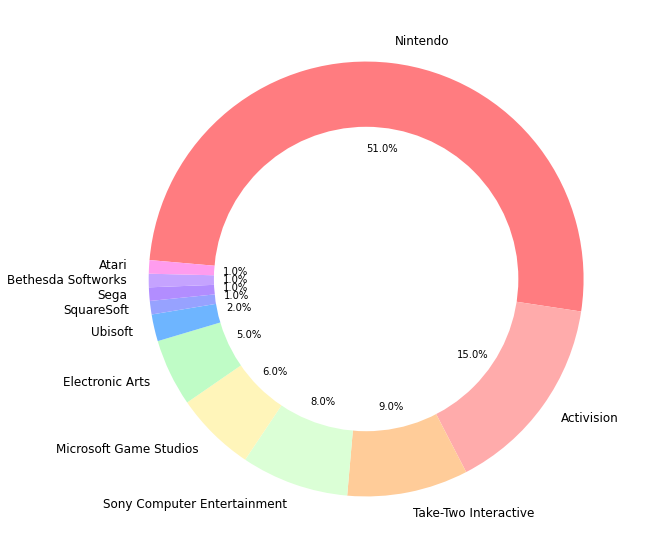

In [ ]:
# Publisher Pie 차트 시각화

rainbows = ['#ff7c80','#ffabab','#ffcc99','#dbffd6','#fff5ba','#bffcc6','#6eb5ff','#97a2ff','#b28dff','#c5a3ff','#ff9cee','#fbe4ff']

best100_group1 = df_best100.groupby(['Publisher'])['Total_Sales'].count().sort_values(ascending=False)
best100_group1.plot.pie(subplots=False, figsize=(10, 10), autopct='%1.1f%%', startangle=175, colors = rainbows, pctdistance=0.6, counterclock=False)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.rc('xtick', labelsize=12)
plt.xlabel('')
plt.ylabel('')


plt.show()

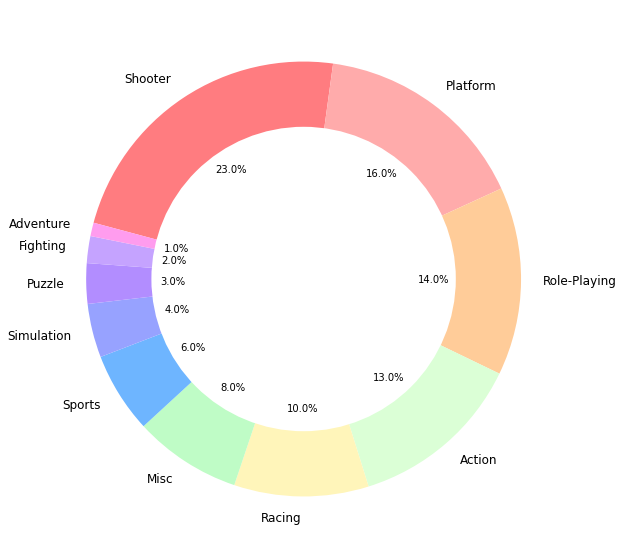

In [ ]:
# Genre Pie 차트 시각화

best100_group2 = df_best100.groupby(['Genre'])['Total_Sales'].count().sort_values(ascending=False)
best100_group2.plot.pie(subplots=False, figsize=(10, 10), autopct='%1.1f%%', startangle=165, colors = rainbows, pctdistance=0.6,counterclock=False)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.rc('xtick', labelsize=12)
plt.xlabel('')
plt.ylabel('')

plt.show()

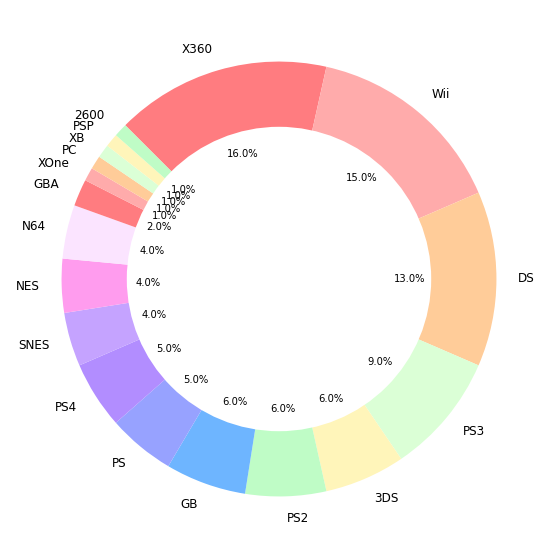

In [ ]:
# Platform Pie 차트 시각화

best100_group3 = df_best100.groupby(['Platform'])['Total_Sales'].count().sort_values(ascending=False)
best100_group3.plot.pie(subplots=False, figsize=(10, 10), autopct='%1.1f%%', startangle=135, colors = rainbows, pctdistance=0.6,counterclock=False)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.rc('xtick', labelsize=12)
plt.xlabel('',)
plt.ylabel('')

plt.show()

In [ ]:
# 최근 히트작 분석

df_best_recent = df_best100.sort_values('Year', ascending=False)

df_best20_recent = df_best_recent.iloc[0:20]

df_best20_recent.head(20)

,Name,Platform,Year,Genre,Publisher,Total_Sales
15981,Call of Duty: Black Ops 3,XOne,2015,Shooter,Activision,7.29
9070,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,14.24
2639,FIFA 16,PS4,2015,Sports,Electronic Arts,8.49
3024,Star Wars Battlefront (2015),PS4,2015,Shooter,Electronic Arts,7.67
7142,Call of Duty: Advanced Warfare,PS4,2014,Shooter,Activision,7.61
2008,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,11.99
4251,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,Nintendo,11.33
12850,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,Nintendo,7.44
3483,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,21.39
5604,Call of Duty: Ghosts,X360,2013,Shooter,Activision,10.21


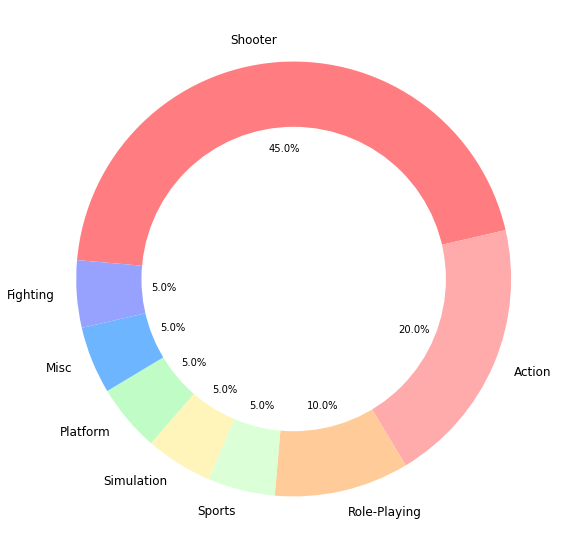

In [ ]:
# 히트작 중 가장 최근의 20개 게임의 장르 시각화

best20_group = df_best20_recent.groupby(['Genre'])['Total_Sales'].count().sort_values(ascending=False)
best20_group.plot.pie(subplots=False, figsize=(10, 10), autopct='%1.1f%%', startangle=175, colors = rainbows, pctdistance=0.6,counterclock=False)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.rc('xtick', labelsize=12)
plt.xlabel('',)
plt.ylabel('')

plt.show()

In [ ]:
# 베이지안 활용하여 성공확률 계산하기

# 성공기준: 상위 30 %, 실패기준: 하위 30% (최근 1000개 데이터 바탕으로)

# 슈팅액션 게임이 성공할 확률 50%
# 성공한 게임이 슈팅액션 일 확률 : ?
# 실패한 게임이 슈팅액션 일 확률 : ?

# 슈팅액션 게임이 성공할 확률 도출

In [ ]:
# 출시연도 최근 게임 불러오기

df_recent = df_game

df_recent['Total_Sales'] = df_recent.NA_Sales + df_recent.EU_Sales + df_recent.JP_Sales + df_recent.Other_Sales
df_recent = df_recent.drop(['NA_Sales','EU_Sales','JP_Sales','Other_Sales'], axis=1)
df_recent = df_recent.sort_values('Year', ascending=False)

df_recent.head(10)

,Name,Platform,Year,Genre,Publisher,Total_Sales
6906,Imagine: Makeup Artist,DS,2020,Simulation,Ubisoft,0.29
10107,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0.03
5310,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0.01
15233,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0.01
3738,Hatsune Miku: Project Diva X,PS4,2016,Misc,Sega,0.03
1070,Guilty Gear Xrd -Revelator-,PS4,2016,Fighting,PQube,0.07
5411,One Piece: Burning Blood,XOne,2016,Fighting,Namco Bandai Games,0.04
5402,Valentino Rossi: The Game,PC,2016,Racing,Namco Bandai Games,0.01
9979,Revolution: 25th Anniversary Collection,PC,2016,Adventure,Koch Media,0.02
1062,Mario & Sonic at the Rio 2016 Olympic Games,3DS,2016,Action,Nintendo,0.45


In [ ]:
# 최근 출시한 1000개 게임 선정, 출고량 기준으로 다시 정렬

df_recent_1000 = df_recent.iloc[0:1000]
df_recent_1000 = df_recent_1000.sort_values('Total_Sales', ascending=False)

df_recent_1000.head()

,Name,Platform,Year,Genre,Publisher,Total_Sales
9070,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,14.24
2639,FIFA 16,PS4,2015,Sports,Electronic Arts,8.49
3024,Star Wars Battlefront (2015),PS4,2015,Shooter,Electronic Arts,7.67
15981,Call of Duty: Black Ops 3,XOne,2015,Shooter,Activision,7.29
11292,Fallout 4,PS4,2015,Role-Playing,Bethesda Softworks,6.96


In [ ]:
# 상위 30%, 하위 30% 데이터프레임 만들기

top_300 = df_recent_1000.iloc[0:300]
bottom_300 = df_recent_1000.iloc[700:]

bottom_300.head()

,Name,Platform,Year,Genre,Publisher,Total_Sales
9076,Langrisser: Re:Incarnation Tensei,3DS,2015,Role-Playing,Extreme Entertainment Group,0.03
15081,Hyperdimension Neptunia Vs. Sega Hard Girls: Y...,PSV,2015,Role-Playing,Compile Heart,0.03
3584,Back to the Future: The Game,X360,2015,Adventure,Telltale Games,0.03
16411,Barbie and Her Sisters Puppy Rescue,3DS,2015,Action,Namco Bandai Games,0.03
11546,Shantae and the Pirate's Curse,3DS,2015,Platform,Intergrow,0.03


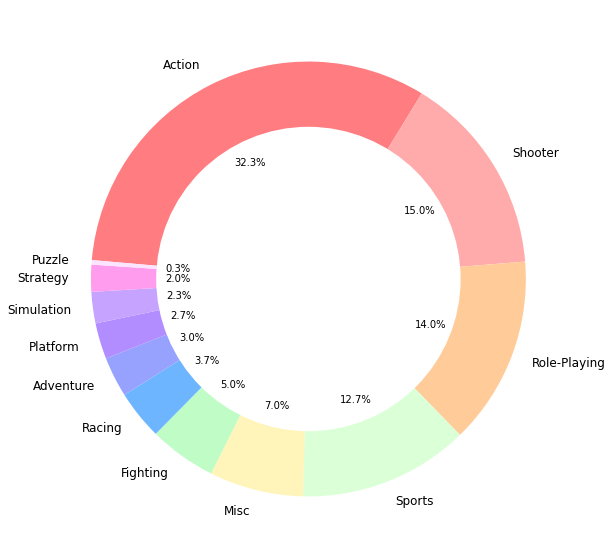

In [ ]:
# top300 장르별 카운트

top_group = top_300.groupby(['Genre'])['Total_Sales'].count().sort_values(ascending=False)
top_group.plot.pie(subplots=False, figsize=(10, 10), autopct='%1.1f%%', startangle=175, colors = rainbows, pctdistance=0.6,counterclock=False)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.rc('xtick', labelsize=12)
plt.xlabel('',)
plt.ylabel('')

plt.show()

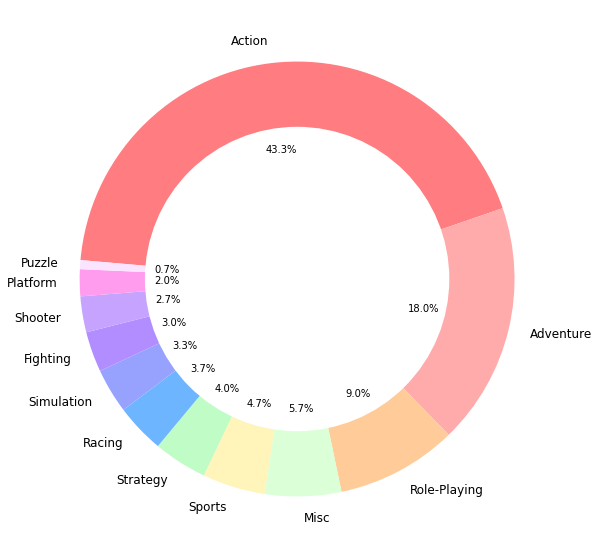

In [ ]:
# bottom300 장르별 카운트

bottom_group = bottom_300.groupby(['Genre'])['Total_Sales'].count().sort_values(ascending=False)
bottom_group.plot.pie(subplots=False, figsize=(10, 10), autopct='%1.1f%%', startangle=175, colors = rainbows, pctdistance=0.6,counterclock=False)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.rc('xtick', labelsize=12)
plt.xlabel('',)
plt.ylabel('')

plt.show()

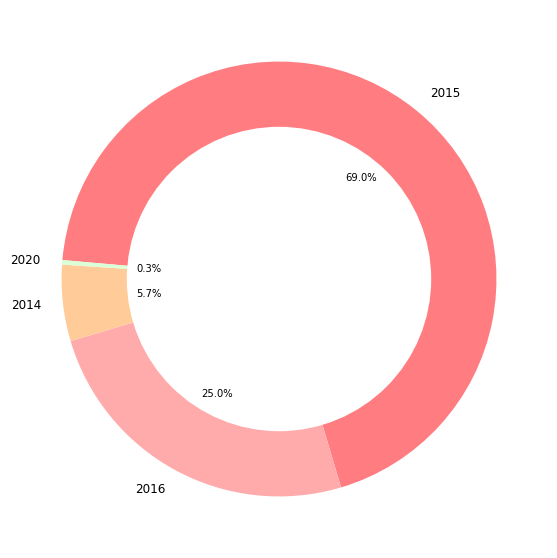

In [ ]:
# 최근 1000개, top300 연도 분포 확인

top_group_year = top_300.groupby(['Year'])['Total_Sales'].count().sort_values(ascending=False)
top_group_year.plot.pie(subplots=False, figsize=(10, 10), autopct='%1.1f%%', startangle=175, colors = rainbows, pctdistance=0.6,counterclock=False)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.rc('xtick', labelsize=12)
plt.xlabel('',)
plt.ylabel('')

plt.show()